In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import random
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [2]:
# files_csv = ['chemistry_1224.csv', 'physics_1225.csv', 'neuro_1225.csv', 'math_1225.csv']
files_csv = ['chemistry_0123.csv', 'physics_0123.csv', 'neuro_0123.csv']
files_csv1 = ['chemistry_colla_info.csv', 'physics_colla_info.csv', 'neuro_colla_info.csv']

<ipython-input-39-9bca72960ed0>:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig5_0731.pdf')
/Users/yanmemgxing/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


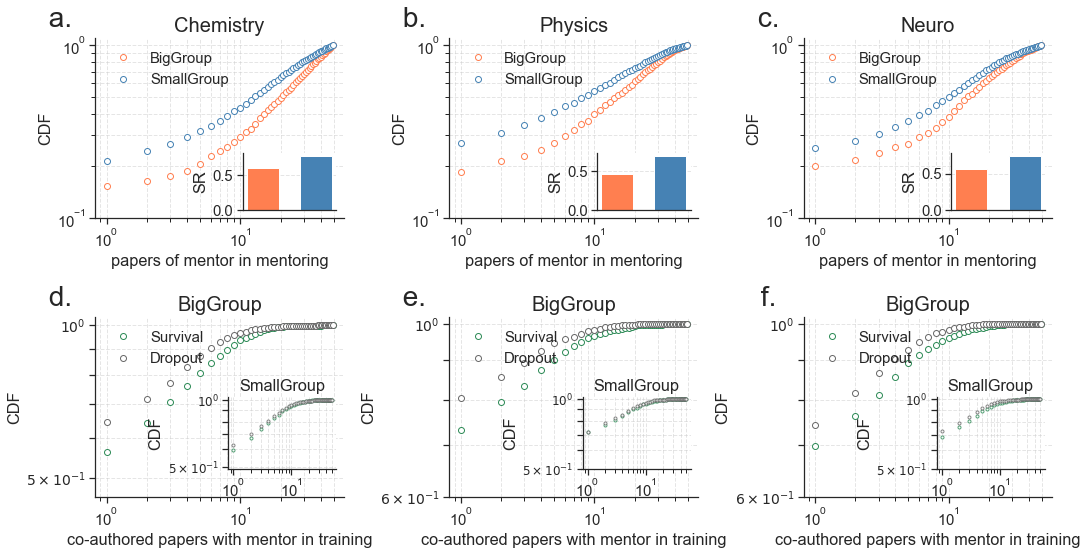

In [39]:
font = { 'weight': 'bold',
         'size': 10,
         }
font1 = { 'weight': 'bold',
         'size': 13,
         }
sns.set(style='ticks', font_scale=1.35, font='Arial')
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
Titles = ['Chemistry','Physics','Neuro','Math']
fig = plt.figure(figsize=(15,8),tight_layout=1)#figsize=(10,3.5)
for ii in range(len(files_csv)):
    
    #准备数据1 prepare data1
    k = files_csv[ii]
    neuro = pd.read_csv(k)
    neuro_19601995 = neuro[(neuro['StopYear']>=1960)&(neuro['StopYear']<=1995)]
    
    BigGroup = neuro_19601995.MenteeID[neuro_19601995.BigOrSmall==1]
    SmallGroup = neuro_19601995.MenteeID[neuro_19601995.BigOrSmall==0]
    Survival_Mentee = neuro_19601995.MenteeID[neuro_19601995.Survival0==1]
    Dropout_Mentee = neuro_19601995.MenteeID[neuro_19601995.Survival0==0]
    
    #准备数据2 prepare data2
    k = files_csv1[ii]
    mto_mte_colla_df = pd.read_csv(k)
    
    
#   cdf distribution
    ax = fig.add_subplot(2,3,ii+1) 
    ax.text(-0.14, 1.1,l_index[ii], fontsize=28,ha='center', va='center', transform=ax.transAxes)
    
    tp_sv_big = mto_mte_colla_df.PubsOfMentorInTraning[
                                              mto_mte_colla_df.Mentee.isin(BigGroup)]
    tp_dp_big = mto_mte_colla_df.PubsOfMentorInTraning[
                                                  mto_mte_colla_df.Mentee.isin(SmallGroup)]

#     print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

    results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
    binWidth = edges[1] - edges[0]

    results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
    binWidth1 = edges1[1] - edges1[0]

    #计算累积概率密度分布 (plot CDF)
    x0 = edges;y0 = results*binWidth
    Y0 = []
    tp = 0
    for k in y0:
        tp+=k
        Y0.append(tp)
    Y0 = np.array(Y0)

    x1 = edges1
    y1 = results1*binWidth1
    Y1 = []
    tp = 0
    for k in y1:
        tp+=k
        Y1.append(tp)
    Y1 = np.array(Y1)
#     ax.set_ylim([0.0001,1])
    ax.loglog(x0[0:len(x0)-1],Y0,label='BigGroup',color='coral',marker='o',ls='',alpha=1,markerfacecolor='white')
    ax.loglog(x1[0:len(x1)-1],Y1,label='SmallGroup',color='steelblue',marker='o',ls='',alpha=1,markerfacecolor='white')
#     legend = ax.legend(loc='upper left',frameon=False)
    legend = ax.legend(loc='upper left')
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') 
    legend.get_frame().set_linewidth(0.0)
    
    
    
    ax.set_xlabel('papers of mentor in mentoring')
    ax.set_ylabel('CDF')
    ax.grid(True,which="both", ls="--",alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(Titles[ii],fontsize=20)
    
    if ii!=3:
        ax.set_ylim([0.1,1.1])

    axins = inset_axes(ax, width=1.3, height=0.8,loc='lower right')
    tp_big = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(BigGroup)]
    tp_small = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(SmallGroup)]

    tp_big_sv = mto_mte_colla_df.Mentee[(mto_mte_colla_df.Mentee.isin(BigGroup))
                                       &(mto_mte_colla_df.Mentee.isin(Survival_Mentee))]
    tp_small_sv = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(SmallGroup)
                                         &(mto_mte_colla_df.Mentee.isin(Survival_Mentee))]

    sr_big = len(tp_big_sv)/len(tp_big)
    sr_small = len(tp_small_sv)/len(tp_small)
    x = [0,0.5]
    y = [sr_big,sr_small]
    axins.bar(x,y,color=['coral','steelblue'],width=0.3)
    
#     axins.set_ylim([0.3,0.75])
#     axins.set_ylabel('Survival\n Rate')
    axins.set_ylabel('SR')
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)
    axins.set_xticks([])
    axins.grid(True,ls='--',alpha=0.5)
#     c = ax.set_xticks(ticks=x,labels=X_ticks)
#     axins.legend()
    
    
    
    
        
#2生存和退出的比较 (survival rate comparison)
    ax = fig.add_subplot(2,3,ii+4)
    ax.text(-0.14, 1.1,l_index[ii+3], fontsize=28,ha='center', va='center', transform=ax.transAxes)
    
    tp_sv_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Survival_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(BigGroup))]
    tp_dp_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Dropout_Mentee))
                                                  &(mto_mte_colla_df.Mentee.isin(BigGroup))]

#     print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

    results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
    binWidth = edges[1] - edges[0]

    results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
    binWidth1 = edges1[1] - edges1[0]

    #计算累积概率密度分布 (plot CDF)
    x0 = edges;y0 = results*binWidth
    Y0 = []
    tp = 0
    for k in y0:
        tp+=k
        Y0.append(tp)
    Y0 = np.array(Y0)

    x1 = edges1
    y1 = results1*binWidth1
    Y1 = []
    tp = 0
    for k in y1:
        tp+=k
        Y1.append(tp)
    Y1 = np.array(Y1)

    ax.loglog(x0[0:len(x0)-1],Y0,label='Survival',color='seagreen',marker='o',ls='',alpha=1,markerfacecolor='white')
    ax.loglog(x1[0:len(x1)-1],Y1,label='Dropout',color='dimgrey',marker='o',ls='',alpha=1,markerfacecolor='white')
    
    legend = ax.legend(loc='upper left')
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') 
    legend.get_frame().set_linewidth(0.0)
    
    ax.set_xlabel('co-authored papers with mentor in training')
    ax.set_ylabel('CDF')
    ax.set_title('BigGroup',fontsize=20)
    ax.grid(True,which="both", ls="--",alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    Y_ticks = [r'$5 \times 10^{-1}$','','','','','$10^{0}$']
    ty = [0.5,0.6,0.7,0.8,0.9,1]
    c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=14)
    
    if ii!=0:
        ax.set_ylim([0.6,1.02])
        Y_ticks = [r'$6 \times 10^{-1}$','','','','$10^{0}$']
        ty = [0.6,0.7,0.8,0.9,1]
        c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=14)
    
    
    #添加子图 (plot insets)
    axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.4, .1, .6, .5),
                   bbox_transform=ax.transAxes)
    
#     axins = inset_axes(ax, width=1.5, height=1,loc='lower right')
    
    tp_sv_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Survival_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(SmallGroup))]
    tp_dp_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Dropout_Mentee))
                                                  &(mto_mte_colla_df.Mentee.isin(SmallGroup))]

#     print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

    results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
    binWidth = edges[1] - edges[0]

    results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
    binWidth1 = edges1[1] - edges1[0]

    #计算累积概率密度分布 (plot CDF)
    x0 = edges;y0 = results*binWidth
    Y0 = []
    tp = 0
    for k in y0:
        tp+=k
        Y0.append(tp)
    Y0 = np.array(Y0)

    x1 = edges1
    y1 = results1*binWidth1
    Y1 = []
    tp = 0
    for k in y1:
        tp+=k
        Y1.append(tp)
    Y1 = np.array(Y1)

    axins.loglog(x0[0:len(x0)-1],Y0,label='Survival',color='seagreen',marker='o',ls='',
                 alpha=0.8,markerfacecolor='white',ms=3)
    axins.loglog(x1[0:len(x1)-1],Y1,label='Dropout',color='dimgrey',marker='o',ls='',
                 alpha=0.8,markerfacecolor='white',ms=3)
#     axins.legend(loc='center right')
#     axins.set_xlabel('co-authored papers with mentor in training')
    axins.set_ylabel('CDF')
    axins.set_title('SmallGroup')
    axins.grid(True,which="both", ls="--",alpha=0.5)
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)
    
#     ax.xaxis.set_major_locator(MultipleLocator(1.0))  # 1的倍数显示主刻度线
    
    Y_ticks = [r'$5 \times 10^{-1}$','','','','','$10^{0}$']
    ty = [0.5,0.6,0.7,0.8,0.9,1]
    c = axins.set_yticks(ticks=ty,labels=Y_ticks,fontsize=12)


fig.savefig('fig5_0731.pdf')